In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import ast

def parse_embeddings_and_type(in_file):
    df = pd.read_csv(
        in_file,
        converters={"embedding": ast.literal_eval},
        usecols=["type", "embedding"],
    )

    return df

scope_classes = {
    "a": "All-α proteins",
    "b": "All-β proteins",
    "c": "α/β proteins",
    "d": "α+β proteins",
    "e": "Multidomain proteins",
    "f": "Membrane and cell surface proteins",
    "g": "Small proteins",
}

embedding = np.load('/home/jc4587/qcb551_proj/data/esm2_8M_embeddings_Similarity.Euclidean_Clustering.Kmeans_pca.npy')
# df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/esm2_8M_embeddings.csv")
# df['type'] = [s[0] for s in df['type'].tolist()]
# N_PER_CLASS = 200 
# # "Stratified fixed-size sample"
# sampled_df = (
#     df.groupby("type", group_keys=False)
#     .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
#     .reset_index(drop=True)
# )
# embedding = np.vstack(sampled_df['embedding'].to_numpy())
embedding = PCA(n_components=2).fit_transform(embedding)
predicted_classes = np.load('/home/jc4587/qcb551_proj/data/esm2_8M_embeddings_Similarity.Euclidean_Clustering.Kmeans.npy')

# Plot
plt.figure(figsize=(9, 7))
colors = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']


plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    color=[colors[i] for i in predicted_classes],
#     label=[colors[i] for i in predicted_classes],
    alpha=0.8,
    s=40,
    edgecolor="none",
)

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP of Protein Embeddings Colored by SCOPe Class")
plt.legend(title="SCOPe Class", fontsize=9)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jc4587/qcb551_proj/data/esm2_8M_embeddings_Similarity.Euclidean_Clustering.Kmeans_pca.npy'

No handles with labels found to put in legend.


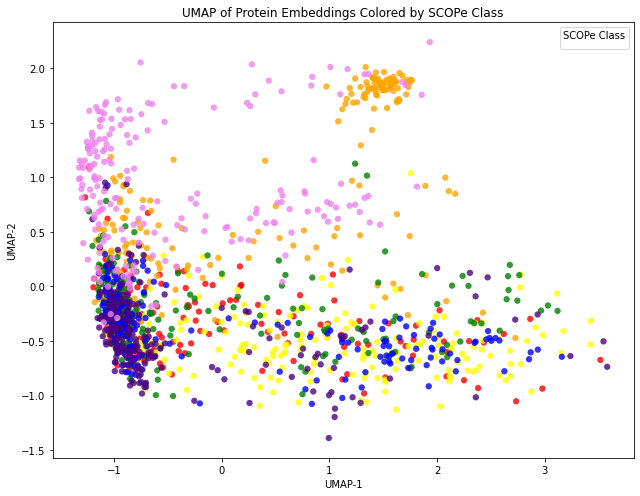

In [26]:
import pandas as pd
df = pd.read_csv(f"/home/jc4587/qcb551_proj/embeddings/esm2_8M_embeddings.csv") # parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/{embedding_name}.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Fix label collumn for esm embeddings
df['type'] = [s[0] for s in df['type'].tolist()]
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)

true_labels = [ord(character.upper())-65 for character in sampled_df['type'].tolist()]
    
# Plot
plt.figure(figsize=(9, 7))
colors = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']


plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    color=[colors[i] for i in true_labels],
#     label=[colors[i] for i in predicted_classes],
    alpha=0.8,
    s=40,
    edgecolor="none",
)

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP of Protein Embeddings Colored by SCOPe Class")
plt.legend(title="SCOPe Class", fontsize=9)
plt.tight_layout()
plt.show()

In [62]:
# embedding_JOSEPH = np.load('/home/jc4587/qcb551_proj/data/esm2_8M_embeddings_Similarity.Euclidean_Clustering.Kmeans_pca.npy')
# df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/esm2_8M_embeddings.csv")
# df['type'] = [s[0] for s in df['type'].tolist()]
# N_PER_CLASS = 200 
# # "Stratified fixed-size sample"
# sampled_df = (
#     df.groupby("type", group_keys=False)
#     .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
#     .reset_index(drop=True)
# )
# embedding_MAXWELL = np.vstack(sampled_df['embedding'].to_numpy())
df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/esm2_8M_embeddings.csv")
df['type'] = [s[0] for s in df['type'].tolist()]
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)
sampled_df

,type,embedding
0,a,"[-0.21263210475444794, -0.12791721522808075, 0..."
1,a,"[0.16448213160037994, 0.011012693867087364, 0...."
2,a,"[-0.048871736973524094, 0.03427813947200775, 0..."
3,a,"[-0.02966749295592308, -0.1289026141166687, -0..."
4,a,"[0.013514973223209381, -0.17160384356975555, 0..."
...,...,...
1395,g,"[0.08347577601671219, 0.01230115257203579, 0.0..."
1396,g,"[0.019633296877145767, -0.2132561206817627, 0...."
1397,g,"[0.005544028244912624, -0.2069583386182785, 0...."
1398,g,"[0.03251742571592331, -0.030413081869482994, 0..."


In [63]:
df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/esm2_8M_embeddings.csv")
df['type'] = [s[0] for s in df['type'].tolist()]
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)
sampled_df

,type,embedding
0,a,"[-0.21263210475444794, -0.12791721522808075, 0..."
1,a,"[0.16448213160037994, 0.011012693867087364, 0...."
2,a,"[-0.048871736973524094, 0.03427813947200775, 0..."
3,a,"[-0.02966749295592308, -0.1289026141166687, -0..."
4,a,"[0.013514973223209381, -0.17160384356975555, 0..."
...,...,...
1395,g,"[0.08347577601671219, 0.01230115257203579, 0.0..."
1396,g,"[0.019633296877145767, -0.2132561206817627, 0...."
1397,g,"[0.005544028244912624, -0.2069583386182785, 0...."
1398,g,"[0.03251742571592331, -0.030413081869482994, 0..."


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Bow
df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/bag_of_words.csv")
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)
sampled_df['true_labels'] = [ord(character.upper())-65 for character in sampled_df['type'].tolist()]
embedding = np.vstack(sampled_df['embedding'].to_numpy())
true_labels = sampled_df['true_labels'].values

X_train, X_test, y_train, y_test = train_test_split(embedding, true_labels, test_size=0.2, random_state=42, stratify=true_labels)

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"BOW Accuracy: {accuracy:.2f}")

BOW Accuracy: 0.67


In [9]:
# Any esm
for esm_size in ['8', '35', '150']:
    df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/esm2_{esm_size}M_embeddings.csv")
    df['type'] = [s[0] for s in df['type'].tolist()]
    N_PER_CLASS = 200 
    # "Stratified fixed-size sample"
    sampled_df = (
        df.groupby("type", group_keys=False)
        .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
        .reset_index(drop=True)
    )
    sampled_df['true_labels'] = [ord(character.upper())-65 for character in sampled_df['type'].tolist()]
    embedding = np.vstack(sampled_df['embedding'].to_numpy())
    true_labels = sampled_df['true_labels'].values
    
    X_train, X_test, y_train, y_test = train_test_split(embedding, true_labels, test_size=0.2, random_state=42, stratify=true_labels)

    rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"ESM{esm_size}M Accuracy: {accuracy:.2f}")

ESM8M Accuracy: 0.82
ESM35M Accuracy: 0.85
ESM150M Accuracy: 0.81


In [14]:
df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/prot_bert_embeddings.csv")
df['type'] = [s[0] for s in df['type'].tolist()]
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)
sampled_df['true_labels'] = [ord(character.upper())-65 for character in sampled_df['type'].tolist()]
embedding = np.vstack(sampled_df['embedding'].to_numpy())
true_labels = sampled_df['true_labels'].values

X_train, X_test, y_train, y_test = train_test_split(embedding, true_labels, test_size=0.2, random_state=42, stratify=true_labels)

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"ProtBert Accuracy: {accuracy:.2f}")

ProtBert Accuracy: 0.75


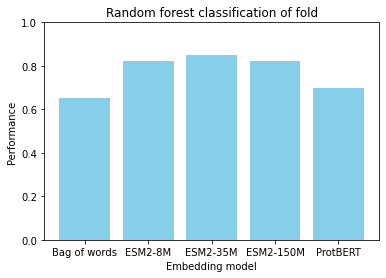

In [15]:
import matplotlib.pyplot as plt
import numpy as np

model = ['Bag of words', 'ESM2-8M', 'ESM2-35M', 'ESM2-150M', 'ProtBERT']
performance = [0.67, 0.82, 0.85, 0.81, 0.7]
plt.bar(model, performance, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Embedding model')
plt.ylabel('Performance')
plt.title('Random forest classification of fold')
plt.show()

In [34]:
!ls data

bag_of_words_Similarity.Cosine_Clustering.Kmeans_clusterlabels.npy
bag_of_words_Similarity.Cosine_Clustering.Kmeans_embeddings.npy
bag_of_words_Similarity.Cosine_Clustering.Spectral_clusterlabels.npy
bag_of_words_Similarity.Cosine_Clustering.Spectral_embeddings.npy
bag_of_words_Similarity.Euclidean_Clustering.Kmeans_clusterlabels.npy
bag_of_words_Similarity.Euclidean_Clustering.Kmeans_embeddings.npy
bag_of_words_Similarity.Euclidean_Clustering.Spectral_clusterlabels.npy
bag_of_words_Similarity.Euclidean_Clustering.Spectral_embeddings.npy
bag_of_words_Similarity.Geodesic_Clustering.Kmeans_clusterlabels.npy
bag_of_words_Similarity.Geodesic_Clustering.Kmeans_embeddings.npy
bag_of_words_Similarity.Geodesic_Clustering.Spectral_clusterlabels.npy
bag_of_words_Similarity.Geodesic_Clustering.Spectral_embeddings.npy
confusion_matrix_Similarity.Cosine_Clustering.Kmeans.png
confusion_matrix_Similarity.Cosine_Clustering.Spectral.png
confusion_matrix_Similarity.Euclidean_Clustering.Kmeans.png
confus

In [42]:
# true labels
df = parse_embeddings_and_type(f"/home/jc4587/qcb551_proj/embeddings/bag_of_words.csv")
df['type'] = [s[0] for s in df['type'].tolist()]
N_PER_CLASS = 200 
# "Stratified fixed-size sample"
sampled_df = (
    df.groupby("type", group_keys=False)
    .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
    .reset_index(drop=True)
)
sampled_df['true_labels'] = [ord(character.upper())-65 for character in sampled_df['type'].tolist()]
embedding = np.vstack(sampled_df['embedding'].to_numpy())
true_labels = sampled_df['true_labels'].values
true_labels

array([0, 0, 0, ..., 6, 6, 6])

Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_colored_by_true_labels_true_class_labels_with_legend.png


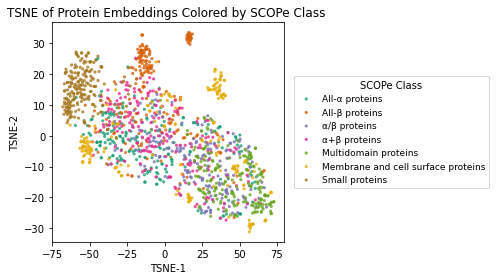

Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_colored_by_true_labels_true_class_labels_with_legend.png


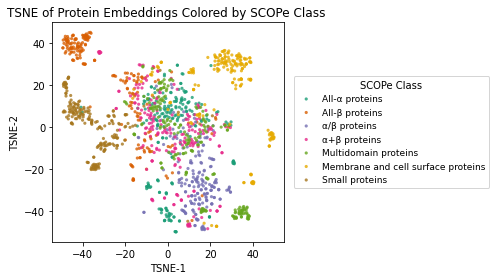

Saved: /home/jc4587/qcb551_proj/plots/esm2_35M_embeddings_colored_by_true_labels_true_class_labels_with_legend.png


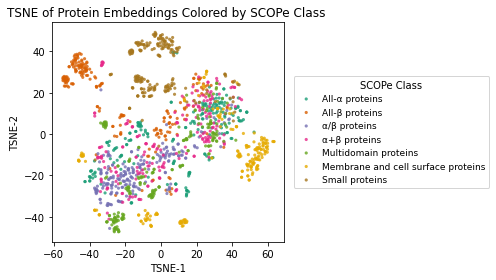

Saved: /home/jc4587/qcb551_proj/plots/esm2_150M_embeddings_colored_by_true_labels_true_class_labels_with_legend.png


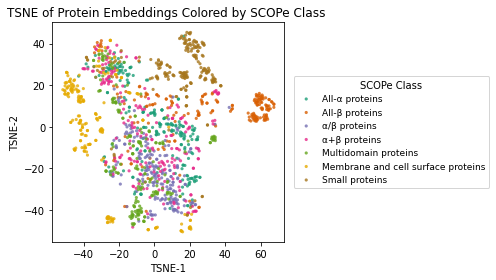

Saved: /home/jc4587/qcb551_proj/plots/prot_bert_embeddings_colored_by_true_labels_true_class_labels_with_legend.png


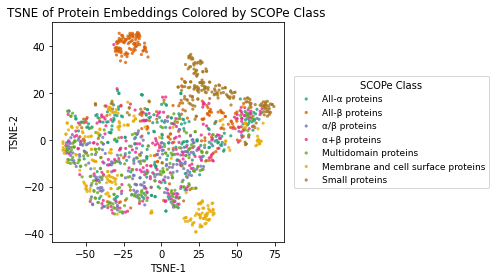

In [48]:
for emb_name in ['bag_of_words', 'esm2_8M_embeddings', 'esm2_35M_embeddings', 'esm2_150M_embeddings', 'prot_bert_embeddings']:
    # Load embeddigs
    name = f'{emb_name}_colored_by_true_labels'
    embedding = np.load(f'/home/jc4587/qcb551_proj/data/{emb_name}_Similarity.Cosine_Clustering.Kmeans_embeddings.npy')
    embedding = TSNE(n_components=2, random_state=1).fit_transform(embedding)
     # Plot
    plt.figure(figsize=(7, 4))
    colors = [
        '#1B9E77',  # teal-green
        '#D95F02',  # burnt orange
        '#7570B3',  # muted violet
        '#E7298A',  # magenta-rose
        '#66A61E',  # olive-green
        '#E6AB02',  # muted mustard
        '#A6761D'   # earthy brown
    ]

    scope_classes = [
        "All-α proteins",
        "All-β proteins",
        "α/β proteins",
        "α+β proteins",
        "Multidomain proteins",
        "Membrane and cell surface proteins",
        "Small proteins",
    ]

    for i, class_name in enumerate(scope_classes):
        idx = true_labels == i
        plt.scatter(
            embedding[idx, 0],
            embedding[idx, 1],
            color=colors[i],
            label=class_name,
            alpha=0.8,
            s=10,
            edgecolor="none",
        )

    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.title("TSNE of Protein Embeddings Colored by SCOPe Class ")
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(
        title="SCOPe Class",
        fontsize=9,
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
    )
    plt.tight_layout()
    outpath = f'/home/jc4587/qcb551_proj/plots/{name}_true_class_labels_with_legend.png'
    plt.savefig(outpath, dpi=500, bbox_inches='tight')
    print(f"Saved: {outpath}")
    plt.show()

    plt.close()

In [39]:
for emb_name in ['bag_of_words', 'esm2_8M_embeddings', 'esm2_35M_embeddings', 'esm2_150M_embeddings', 'prot_bert_embeddings']:
    for sim in ['Cosine', 'Euclidean', 'Geodesic']:
        for clust in ['Kmeans', 'Spectral']:

            # Load embeddigs
            name = f'{emb_name}_{sim}_{clust}'
            embedding = np.load(f'/home/jc4587/qcb551_proj/data/{emb_name}_Similarity.{sim}_Clustering.{clust}_embeddings.npy')
            labels = np.load(f'/home/jc4587/qcb551_proj/data/{emb_name}_Similarity.{sim}_Clustering.{clust}_clusterlabels.npy')
            embedding = TSNE(n_components=2, random_state=1).fit_transform(embedding)
                
            # Plot
            plt.figure(figsize=(7, 7))
            colors = [
                '#1B9E77',  # teal-green
                '#D95F02',  # burnt orange
                '#7570B3',  # muted violet
                '#E7298A',  # magenta-rose
                '#66A61E',  # olive-green
                '#E6AB02',  # muted mustard
                '#A6761D'   # earthy brown
            ]

            scope_classes = [
                "All-α proteins",
                "All-β proteins",
                "α/β proteins",
                "α+β proteins",
                "Multidomain proteins",
                "Membrane and cell surface proteins",
                "Small proteins",
            ]

            for i, class_name in enumerate(scope_classes):
                idx = labels == i
                plt.scatter(
                    embedding[idx, 0],
                    embedding[idx, 1],
                    color=colors[i],
                    label=class_name,
                    alpha=0.8,
                    s=40,
                    edgecolor="none",
                )

            plt.xlabel("TSNE-1")
            plt.ylabel("TSNE-2")
            plt.title("TSNE of Protein Embeddings Colored by SCOPe Class")
            # plt.gca().set_aspect('equal', adjustable='box')
            # plt.legend(
            #     title="SCOPe Class",
            #     fontsize=9,
            #     loc='center left',
            #     bbox_to_anchor=(1.02, 0.5),
            # )
            plt.tight_layout()
            outpath = f'/home/jc4587/qcb551_proj/plots/{name}.png'
            plt.savefig(outpath, dpi=500, bbox_inches='tight')
            print(f"Saved: {outpath}")

            plt.close()

Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Cosine_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Cosine_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Euclidean_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Euclidean_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Geodesic_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/bag_of_words_Geodesic_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Cosine_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Cosine_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Euclidean_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Euclidean_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Geodesic_Kmeans.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_8M_embeddings_Geodesic_Spectral.png
Saved: /home/jc4587/qcb551_proj/plots/esm2_35M_embeddings_Cosine_Kmeans.png
Saved: /home/jc4587/qcb551_p